In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.describe(include=object)

,Address
count,5000
unique,5000
top,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."
freq,1


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Numerical columns

In [10]:
numeric_cols=df.select_dtypes(include='number')

In [11]:
numeric_cols

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


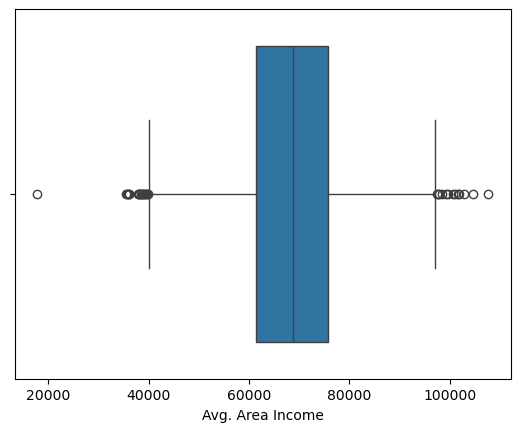

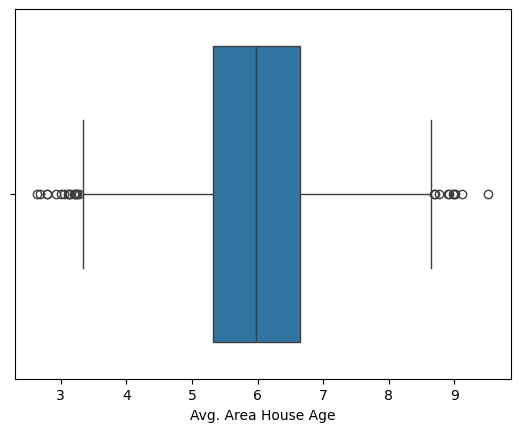

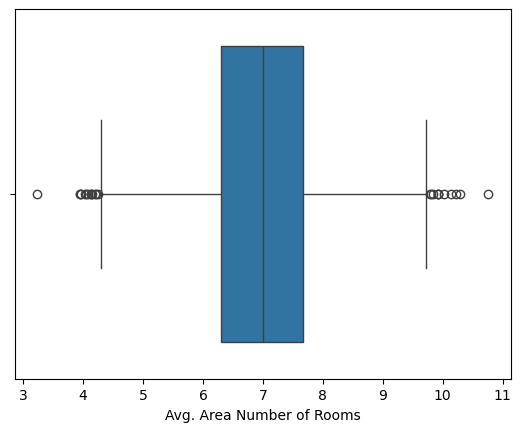

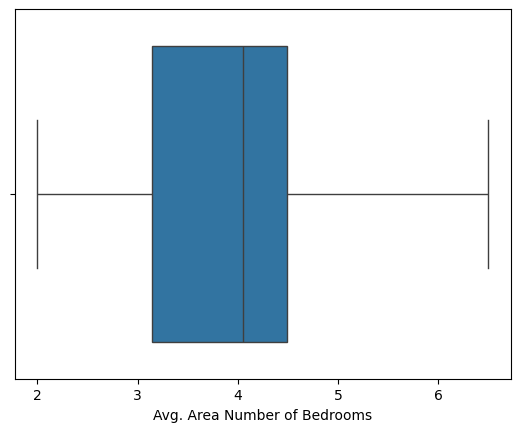

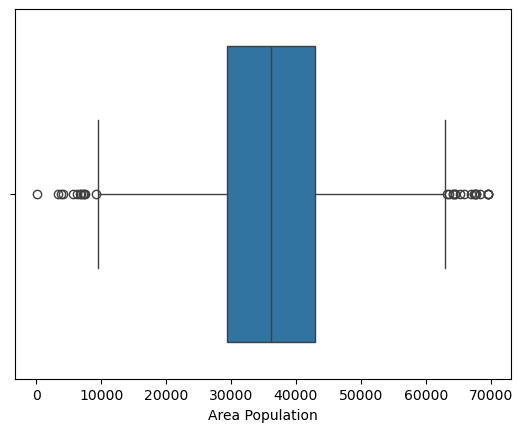

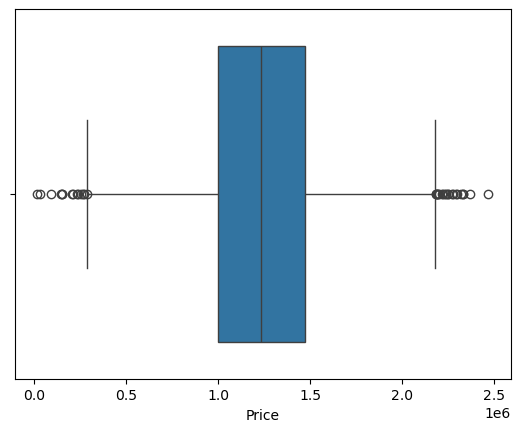

In [14]:
# Boxplot to identify outliers
for i in numeric_cols.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

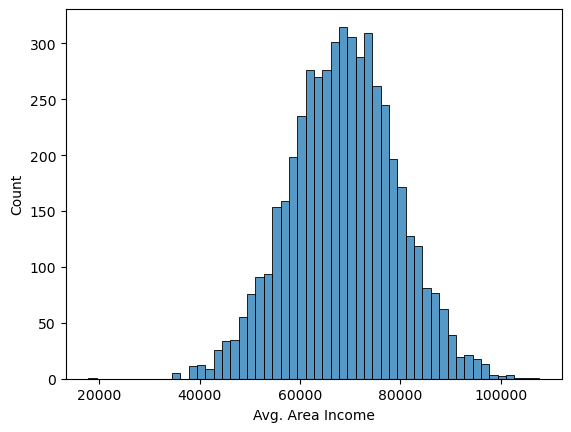

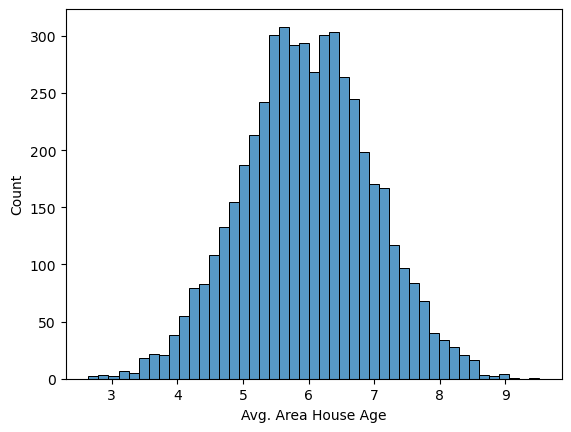

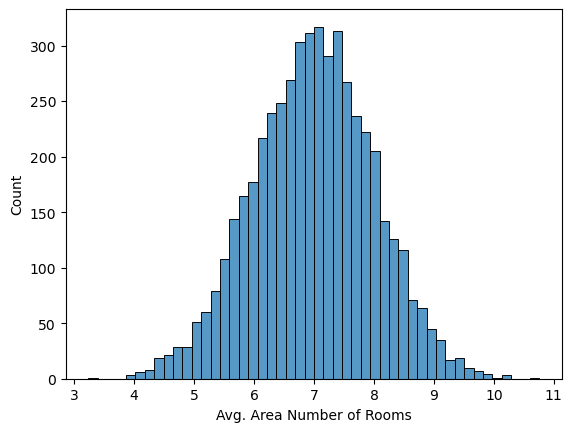

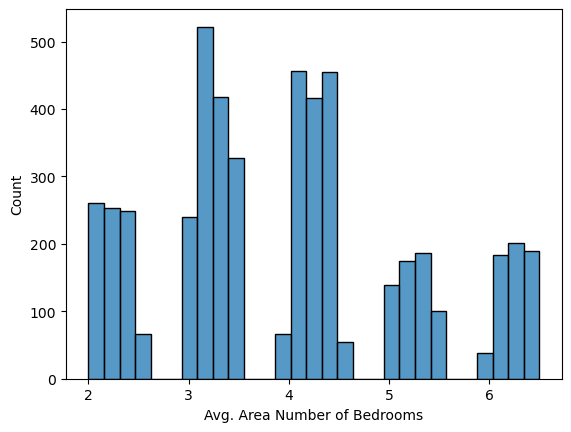

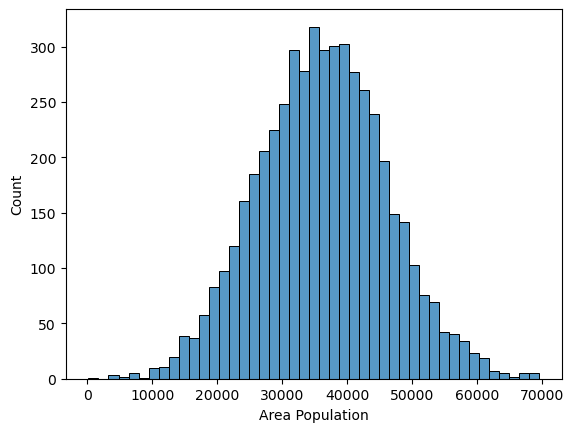

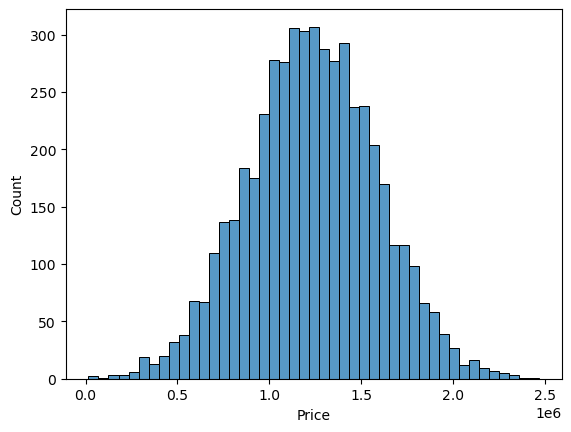

In [15]:
# Histogram to understand distribution of numeric data
for i in numeric_cols.columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

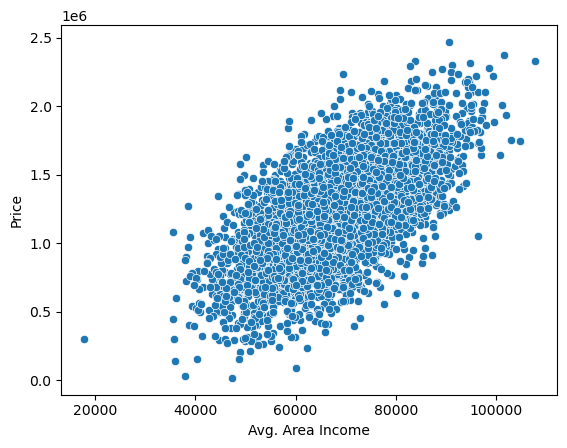

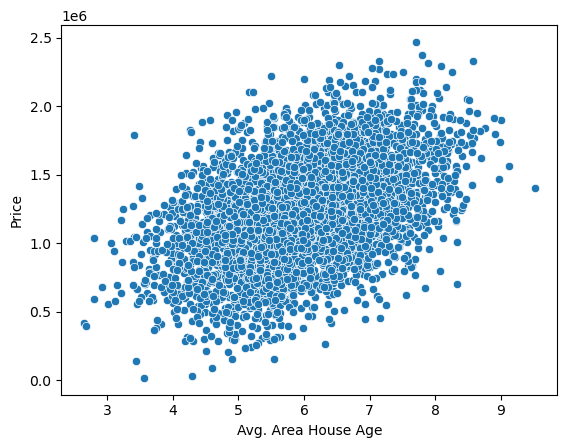

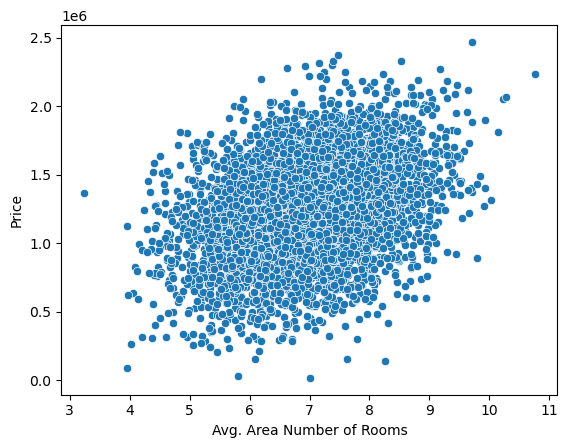

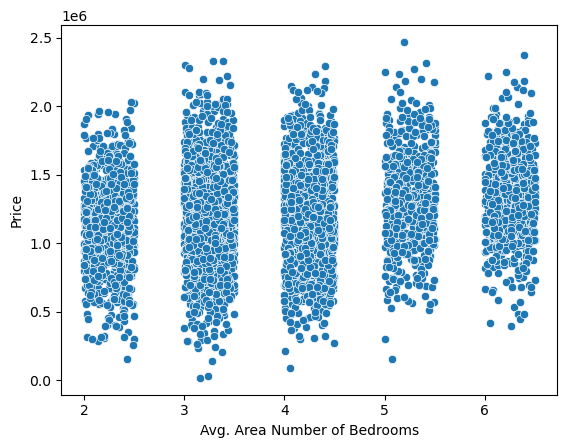

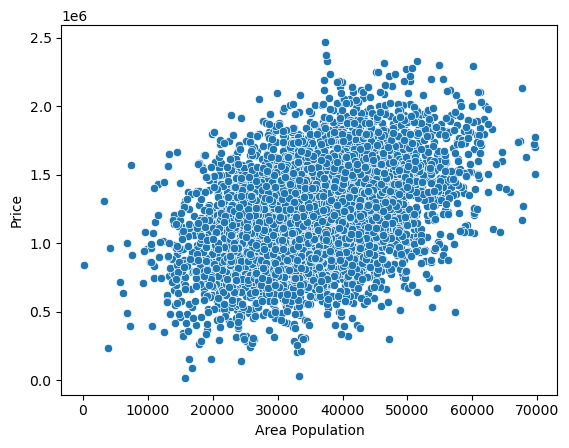

In [18]:
# Scatterplot to understand correlationship between variables (independent(predictors) and dependent(target) variables)
for i in ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']:
    sns.scatterplot(data=df,x=i,y='Price')
    plt.show()

In [25]:
# Identify coorelation
numeric_cols.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


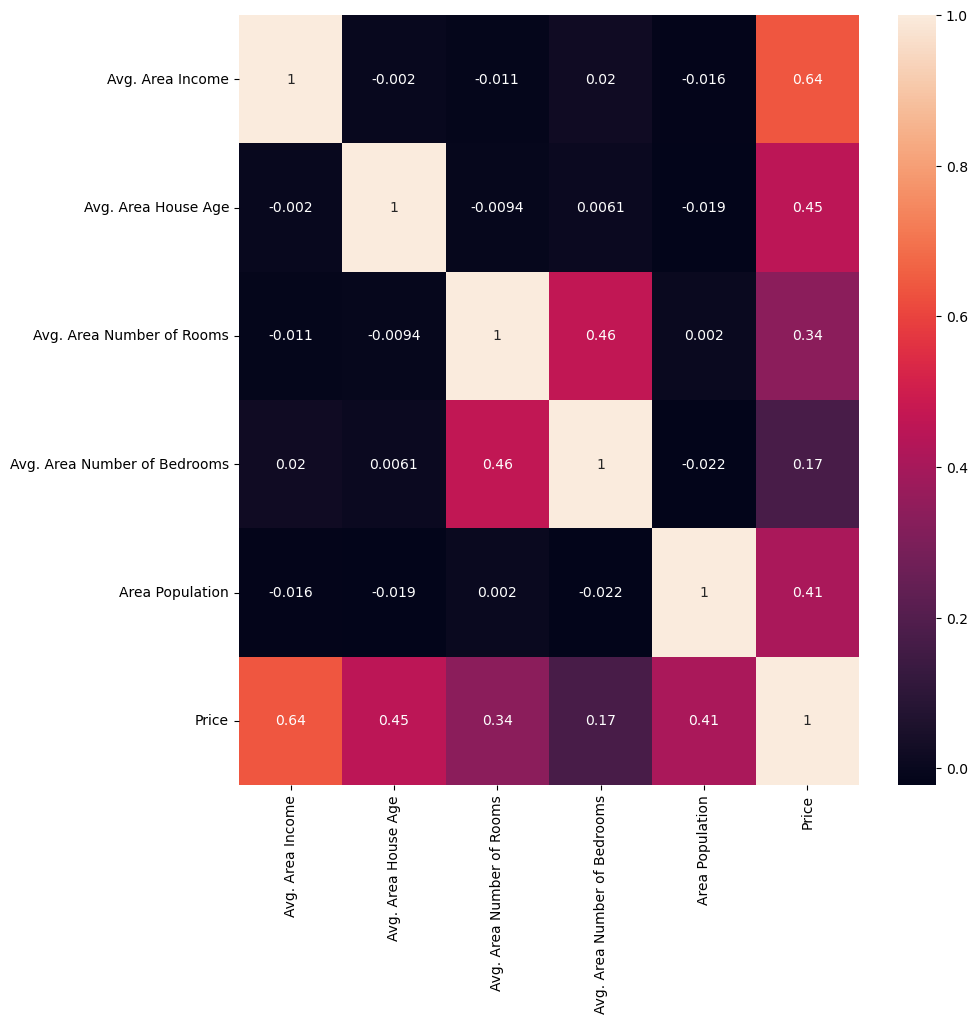

In [28]:
# Heatmap to identify coorelation between independent and dependent variables
plt.figure(figsize=(10,10))
sns.heatmap(numeric_cols.corr(),annot=True)
plt.show()

### Outlier treatment

In [29]:
# Decide on which column to do outlier detection --> All columns except Price, Avg. Area Number of Bedrooms
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [30]:
wisker(df['Avg. Area Income'])

(np.float64(40026.39797192346), np.float64(97237.50308269015))

In [31]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [32]:
for i in ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

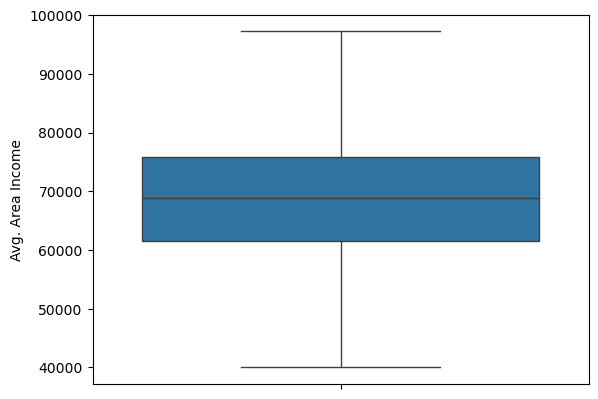

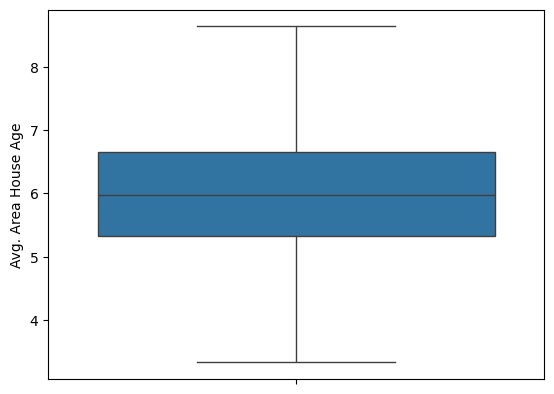

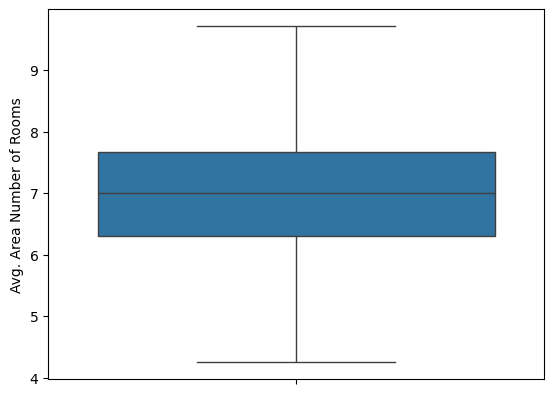

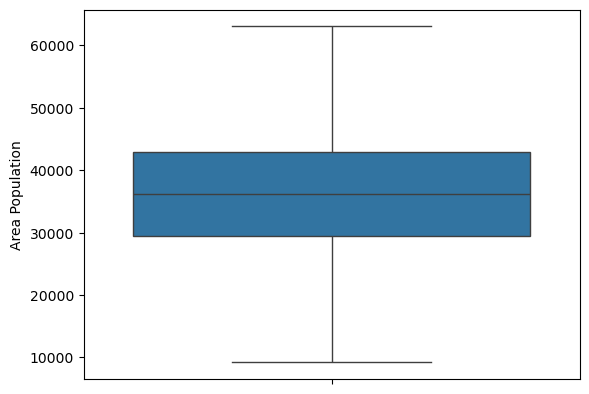

In [33]:
for i in ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']:
    sns.boxplot(df[i])
    plt.show()

### Categorical columns

In [13]:
categorical_cols=df.select_dtypes(include='object')
categorical_cols

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [34]:
df['State'] = df['Address'].str.extract(r'([A-Z]{2})\s\d{5}')

In [35]:
df['State']

0       NE
1       CA
2       WI
3       AP
4       AE
        ..
4995    AP
4996    AA
4997    VA
4998    AE
4999    NV
Name: State, Length: 5000, dtype: object

In [36]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,AE


In [41]:
df.drop('Address', axis=1,inplace=True)

In [42]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


In [52]:
# One HotEncoding--> using get_dummies
df = pd.get_dummies(data=df,columns=['State'],drop_first=True)

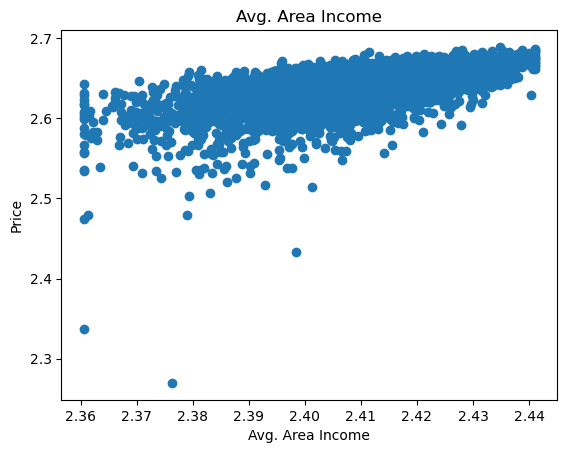

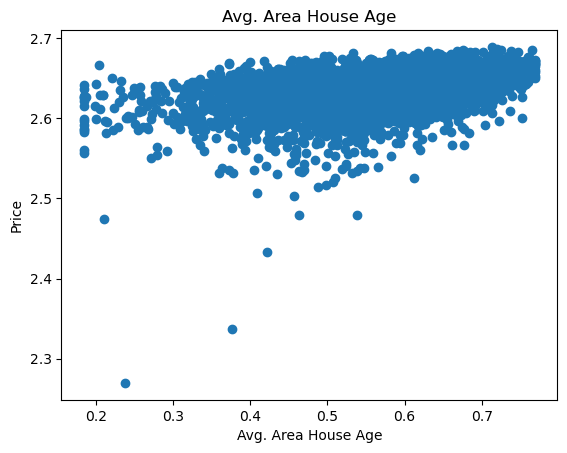

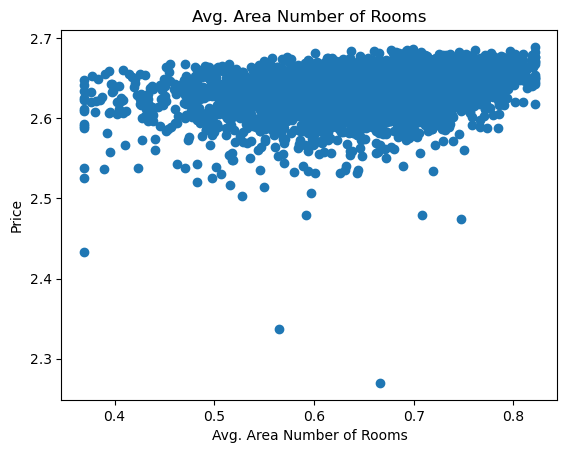

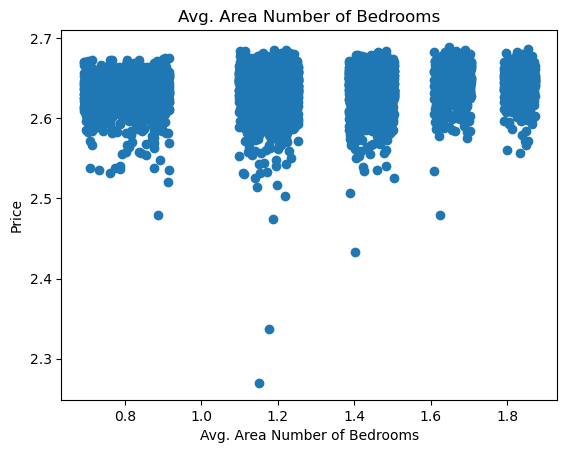

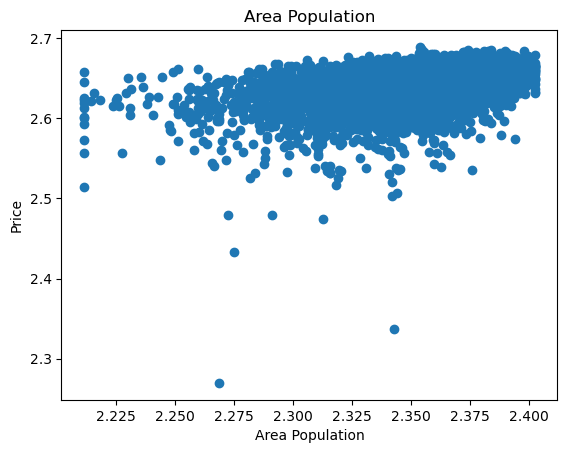

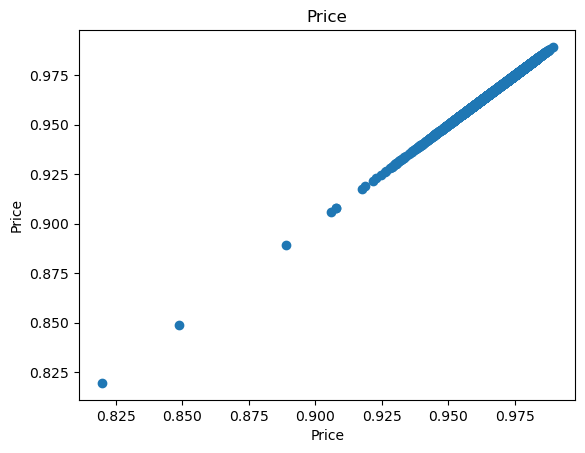

In [53]:
# By plotting Histogram we understand that there is missing normal distribution for numeric data
# We will be using logarithmic transformation
for feature in numeric_cols:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

In [54]:
num_features=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population','Price']

for feature in num_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])

In [55]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State_AE,State_AK,State_AL,State_AP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,2.423393,0.552421,0.666404,4.09,2.307276,2.629935,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.423062,0.583468,0.645372,3.09,2.360944,2.654994,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.400013,0.570502,0.761536,5.13,2.352849,2.629932,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2.403005,0.679274,0.542553,3.26,2.345951,2.642417,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2.398059,0.480892,0.722298,4.23,2.320364,2.591889,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Feature scaling

In [56]:
# Used Standardization for feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols=numeric_cols.columns

df_scaled = df.copy()

df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [58]:
df_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State_AE,State_AK,State_AL,State_AP,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.003630,-0.158481,0.128766,0.088062,-1.340005,-0.286028,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.980603,0.152146,-0.139808,-0.722301,0.491388,0.728559,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.621195,0.022417,1.343627,0.930840,0.215148,-0.286153,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.413262,1.110715,-1.452836,-0.584540,-0.020235,0.219343,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,-0.757007,-0.874152,0.842558,0.201513,-0.893373,-1.826460,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Applt Regression Algorithm

In [59]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'State_AE',
       'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AS', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_FM', 'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MH', 'State_MI', 'State_MN', 'State_MO',
       'State_MP', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_PR', 'State_PW', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VI', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'],
      dtype='object')

In [61]:
# Select Independent and Dependent variables
X=df_scaled.loc[:,['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'State_AE',
       'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AS', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_FM', 'State_GA', 'State_GU', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MH', 'State_MI', 'State_MN', 'State_MO',
       'State_MP', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_PR', 'State_PW', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VI', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State_AE,State_AK,State_AL,State_AP,State_AR,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.003630,-0.158481,0.128766,0.088062,-1.340005,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.980603,0.152146,-0.139808,-0.722301,0.491388,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.621195,0.022417,1.343627,0.930840,0.215148,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.413262,1.110715,-1.452836,-0.584540,-0.020235,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.757007,-0.874152,0.842558,0.201513,-0.893373,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.695647,1.535584,-0.773480,-0.422467,-1.376922,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4996,0.921416,0.974564,-0.295836,0.031337,-0.988720,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,-0.408754,1.154432,-2.623683,-1.500251,-0.121366,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4998,0.031143,-0.312105,0.240484,1.182053,0.681609,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
y=df_scaled.iloc[:,5]
y

0      -0.286028
1       0.728559
2      -0.286153
3       0.219343
4      -1.826460
          ...   
4995   -0.282832
4996    0.684202
4997   -0.365168
4998    0.073814
4999    0.305593
Name: Price, Length: 5000, dtype: float64

In [64]:
# Split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State_AE,State_AK,State_AL,State_AP,State_AR,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
1840,-1.278609,-2.479803,1.646107,0.323068,0.750800,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2115,-0.517354,0.579115,0.687823,-0.641265,0.997400,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4437,0.830681,-0.448649,1.150301,-0.706094,-0.848823,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1146,-0.170295,0.491156,-0.067460,-0.649369,-0.665485,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2486,0.153763,0.908752,1.183123,0.250135,0.206063,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.740408,0.479519,-1.789430,-1.265245,-0.443557,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466,-1.115070,0.944242,0.566880,-0.487296,0.733456,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3092,-0.137176,0.593263,-0.259801,-0.681783,0.250724,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3772,-0.894228,1.253382,1.841615,0.274446,1.186153,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State_AE,State_AK,State_AL,State_AP,State_AR,...,State_TN,State_TX,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
1501,-0.557712,0.988276,-0.438839,-0.592643,0.770609,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2586,-1.062085,0.895879,0.045965,-0.689887,0.744133,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2653,0.228785,0.782597,-0.208255,-1.597494,-0.549612,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1055,0.150706,0.418604,0.869516,0.242031,-1.145954,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
705,0.472029,-3.634295,-0.381902,-1.216623,1.227866,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,0.574546,0.383377,1.450085,-0.487296,-1.003029,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1538,0.309973,-0.230300,0.496551,0.225824,-1.189609,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1837,-0.381580,0.770181,0.757503,-0.446778,0.785195,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2380,-1.183930,0.649250,0.081604,0.339275,1.912161,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred=regression.predict(X_test)
y_pred

array([ 0.22870201,  0.00366057,  0.1804669 , ...,  0.62981469,
        0.32568617, -0.3422018 ])

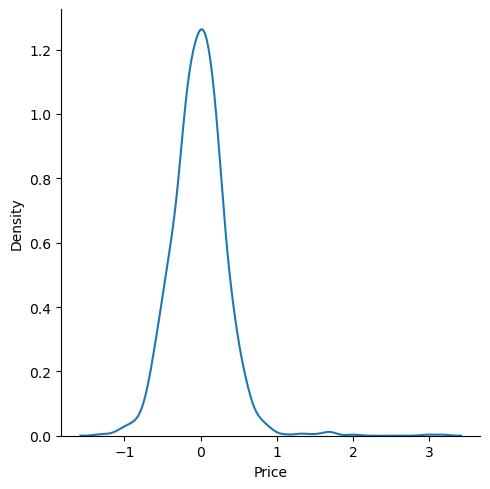

In [73]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.12948645809922496
0.26215738980712083
0.35984226836104866
